### 2022 Fall Phy 765 Advanced Quantum Mechanics Project #2 Problem 1
### Members: Michael Straus, Eren Guttentag, Jiyong Yu

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
from worm_simulation import Worm_algorithm

In [3]:
################################################### Block function #####################################################
def block(array, N):
    # Device the given array into blocks with block size N
    
    l = int(len(array) / N)
    
    blocked_array = np.zeros([l, N])
    
    for i in range(l):
        block_start = i * N
        block_end = block_start + N
        
        blocked_array[i] = array[block_start: block_end]
        
    return blocked_array

def get_error(blocked_array):
    l = len(blocked_array)
    average_each_block = []
    
    for i in range(l):
        average_each_block.append(np.average(blocked_array[i]))

    return np.std(average_each_block) / np.sqrt(l)


################################################### Simulation #####################################################

### Parameter Setting ###
[N, epsilon, beta, dimension] = [4, 0.01, 100, 3]

N_mu = 300
mu_array = np.linspace(0, 0.5, N_mu)

num_trials = 1000 # Monte-Carlo try number
block_size = 50

n_array = [] # saves number of particle result for each mu
n_error_array = [] # saves error result for each mu

### Get the number of particles varying the mu ###
for mu in mu_array:
    parameters = [N, mu, epsilon, beta, dimension]
    worm_algorithm = Worm_algorithm(parameters) # Initialization
    n_Monte_Carlo = [] # Saves the number of particle result of each Monte-Carlo try
    
    # Monte-Carlo simulation part
    for counter in range(num_trials):
        num_particles, e_tilda, weight, num_winding = worm_algorithm.measure_observables()
        n_Monte_Carlo.append(num_particles)

        old_grid = worm_algorithm.get_pathed_grid()
        new_grid = worm_algorithm.update_grid(old_grid)
        worm_algorithm.set_pathed_grid(new_grid)
        
        #print('-----------------' + str(counter) + ' New grid created----------------------')
        #if (((counter + 1) % 500) == 0): print('-----------------' + str(counter + 1) + ' New grid created----------------------')
    
    n_array.append(np.average(n_Monte_Carlo))
    n_error_array.append(get_error(block(n_Monte_Carlo, block_size)))
    
    print('-----------------------mu = %.5f done-----------------------------' %mu)
    
    

-----------------------mu = 0.00000 done-----------------------------
-----------------------mu = 0.00167 done-----------------------------
-----------------------mu = 0.00334 done-----------------------------
-----------------------mu = 0.00502 done-----------------------------
-----------------------mu = 0.00669 done-----------------------------
-----------------------mu = 0.00836 done-----------------------------
-----------------------mu = 0.01003 done-----------------------------
-----------------------mu = 0.01171 done-----------------------------
-----------------------mu = 0.01338 done-----------------------------
-----------------------mu = 0.01505 done-----------------------------
-----------------------mu = 0.01672 done-----------------------------
-----------------------mu = 0.01839 done-----------------------------
-----------------------mu = 0.02007 done-----------------------------
-----------------------mu = 0.02174 done-----------------------------
--------------------

<ErrorbarContainer object of 3 artists>

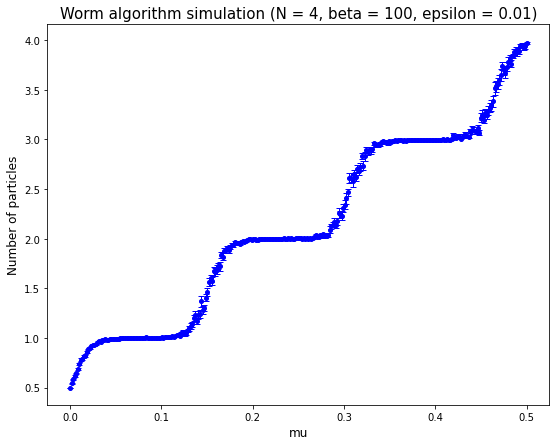

In [4]:
plt.rcParams['figure.facecolor'] = 'white'
#plt.plot(mu_array, n_array)

plt.figure(figsize = (9, 7))
plt.xlabel('mu', fontsize = 12)
plt.ylabel('Number of particles', fontsize = 12)
plt.title('Worm algorithm simulation (N = 4, beta = 100, epsilon = 0.01)', fontsize = 15)
plt.errorbar(mu_array, n_array, yerr = n_error_array, marker = 'o', markersize = 4, color = 'blue', linestyle = 'none', linewidth = 1, capsize = 3)

